In [2]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'../src/')

from utils import *
from pipe import *
from pipe_system import PipeSystem
from abstract_pipe import *
from pipe_system.let_index import LetIndex

In [3]:
with open('dev_Pipes.pickle','rb') as f:
    pipes, shifts = pickle.load(f)

In [4]:
bdr_pipe = BoundaryPipe([BoundaryLet(-10,0,0,2,1),BoundaryLet(36,0,np.pi,2,-1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]
ps = PipeSystem(real_pipes,bdr_pipe)

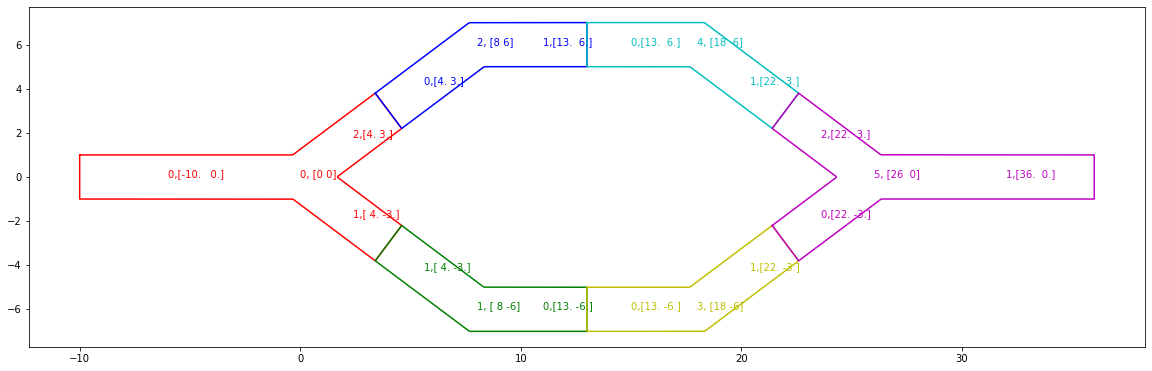

In [5]:
color = ['r','g','b','y','c','m','k']

fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

for a,i,j,c in zip(range(10),pipes,shifts,color):
    ax.plot(*(i.closed_boundary + j).T,c=c)
    for k,let in enumerate(i.lets):
        ax.text(*(0.6*let.matching_pt + j),f'{k},{let.matching_pt + j}',color=c)
    ax.text(*j,f'{a}, {j}',color=c)

In [6]:
xs, ys, interior, u_field, v_field, p_field, o_field = ps.plotting_data()

In [7]:
xs.shape, interior.shape

((97006,), (97006,))

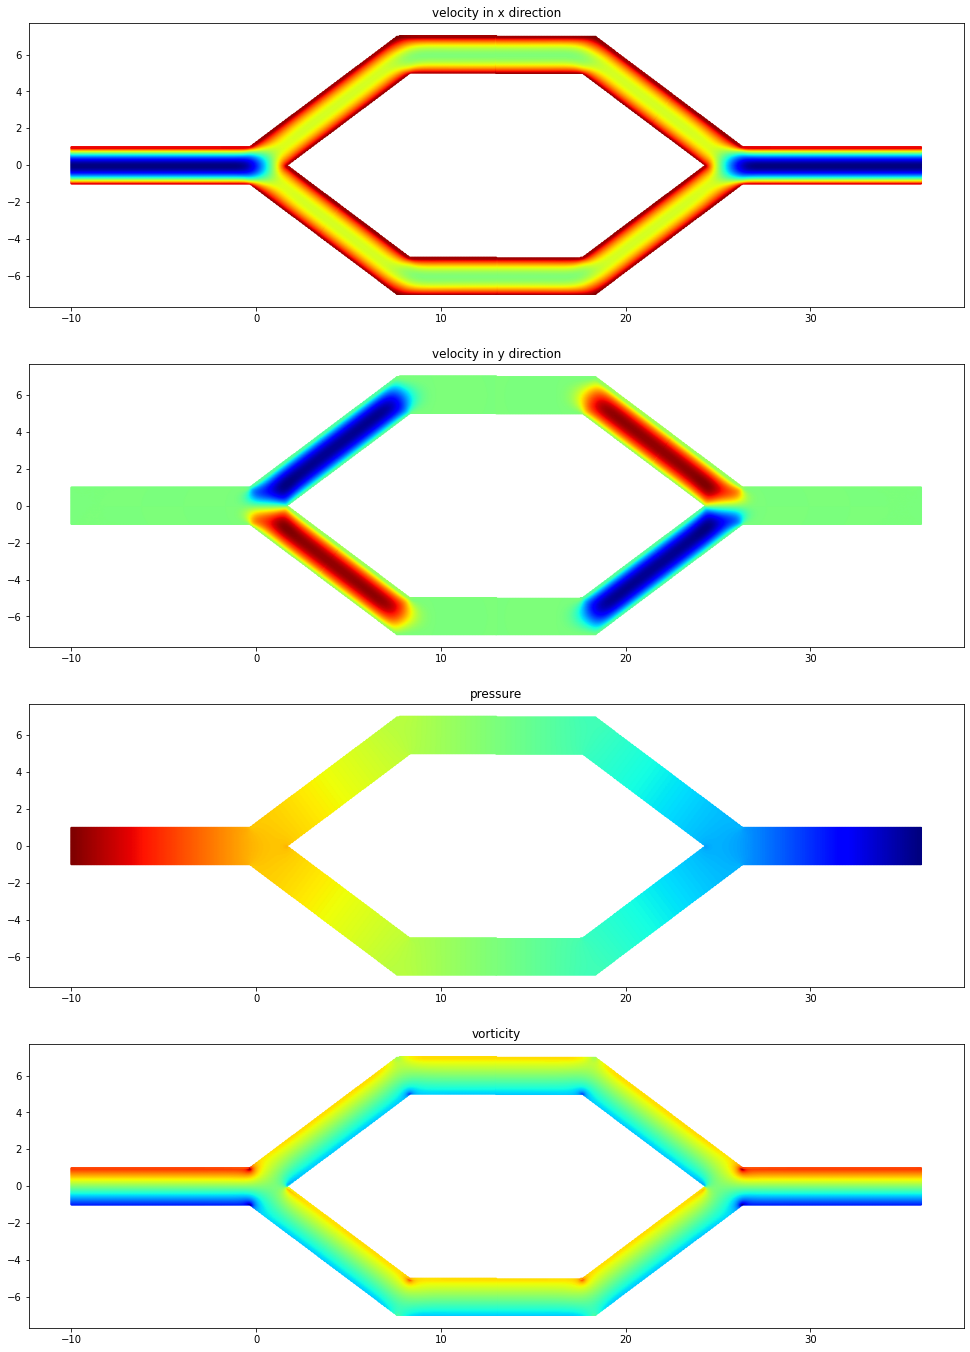

In [8]:
fig,axes = plt.subplots(4,1,figsize=(20,24))

for ax, field, title, in zip(axes, [u_field,v_field,p_field,o_field], ['velocity in x direction','velocity in y direction','pressure','vorticity']):
    ax.set_aspect('equal')
    ax.scatter(xs,ys,c=field,s=1,cmap='jet')
    ax.set_title(title)

Text(0.5, 1.0, 'vorticity')

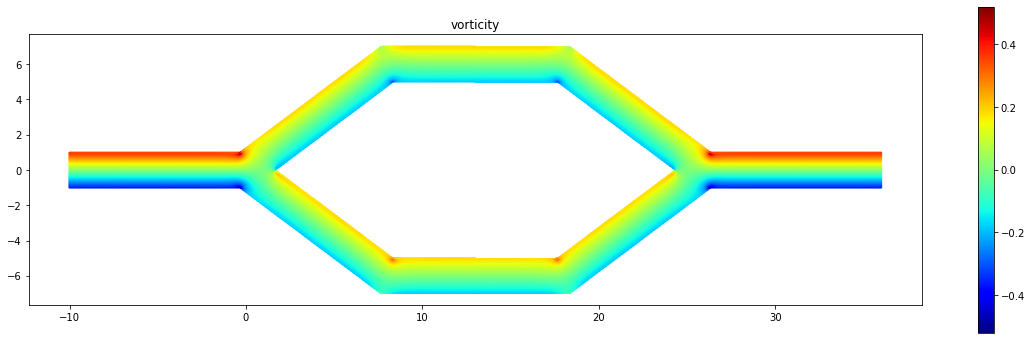

In [10]:
fig,ax = plt.subplots(figsize=(20,6))

field = o_field
title = 'vorticity'
ax.set_aspect('equal')
fig.colorbar(ax.scatter(xs,ys,c=field,s=1,cmap='jet'))
ax.set_title(title)
